In [2]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [3]:
city = "Springfield"
content = "user"

df = pd.read_csv(f'../filtered_cities/{city}_{content}.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7707 entries, 0 to 7706
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             7707 non-null   object 
 1   name                7707 non-null   object 
 2   review_count        7707 non-null   int64  
 3   yelping_since       7707 non-null   object 
 4   useful              7707 non-null   int64  
 5   funny               7707 non-null   int64  
 6   cool                7707 non-null   int64  
 7   elite               635 non-null    object 
 8   friends             7707 non-null   object 
 9   fans                7707 non-null   int64  
 10  average_stars       7707 non-null   float64
 11  compliment_hot      7707 non-null   int64  
 12  compliment_more     7707 non-null   int64  
 13  compliment_profile  7707 non-null   int64  
 14  compliment_cute     7707 non-null   int64  
 15  compliment_list     7707 non-null   int64  
 16  compli

In [5]:
df['friends'] = df['friends'].fillna('')

In [6]:
df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,IpLRJY4CP3fXtlEd8Y4GFQ,Robyn,518,2009-04-11 14:35:46,1325,450,348,"2009,2010,2011","hdwDo7CLh9aN_9PckAos4Q, ci-mepWGgsgGT3sFI2mhMg...",35,...,4,2,7,1,35,17,20,20,20,6
1,RgDVC3ZUBqpEe6Y1kPhIpw,Monica,1282,2009-02-23 14:08:31,12640,10005,11149,"2009,2010,2011,2012,2013,2014,2015,2016","sHozd2pcOKwHtPr8VlZJfg, 7mL9cvICl8fuCQTM89a-SA...",804,...,102,108,138,65,898,2584,1731,1731,551,177
2,om5ZiponkpRqUNa3pVPiRg,Andrea,2811,2006-01-18 02:35:04,18545,9225,13824,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","bQiST5YdWLSH_yk56ccApA, r7Zi52GqnJa6Tb0dqTKlkw...",1002,...,136,88,214,102,1370,2284,1639,1639,437,189
3,KrIL3TIOJI-tjvU6BlcA-g,Elisabeth,141,2010-06-17 22:38:44,225,58,83,"2011,2012","eUlLKiRbX3k4VS3Ko_WxTA, nmiOEav_m5eT08zz8BIi4A...",18,...,5,3,0,0,9,5,7,7,4,0
4,1sGYXSkJHPhJ6wQtc-RbZw,Kimberly,820,2009-07-12 01:03:14,5441,2976,4264,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","9w4vI3LRTA4JdJyzOxeEMw, fNSGyM1NJ91CTO_VfJ5asQ...",149,...,31,43,12,8,154,403,541,541,265,148


In [7]:
df.duplicated().sum()

0

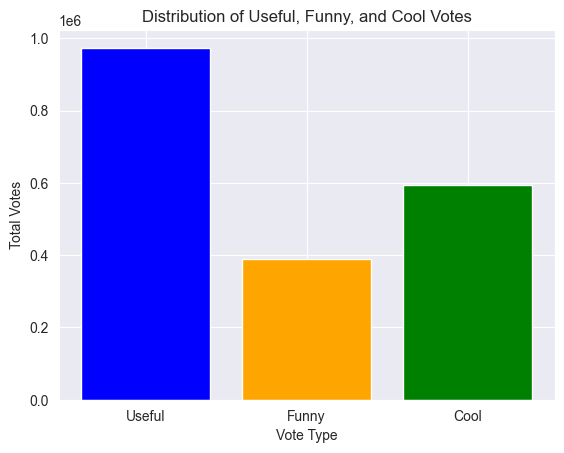

In [8]:
total_useful = df['useful'].sum()
total_funny = df['funny'].sum()
total_cool = df['cool'].sum()
totals = {'Useful': total_useful, 'Funny': total_funny, 'Cool': total_cool}

plt.bar(totals.keys(), totals.values(), color=['blue', 'orange', 'green'])
plt.title('Distribution of Useful, Funny, and Cool Votes')
plt.xlabel('Vote Type')
plt.ylabel('Total Votes')
plt.show()

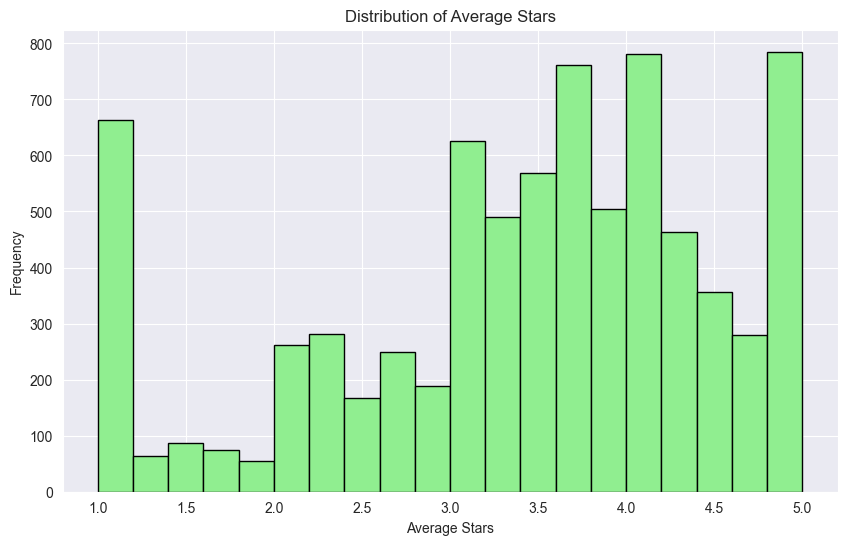

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df['average_stars'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Average Stars')
plt.ylabel('Frequency')
plt.title('Distribution of Average Stars')
plt.grid(True)
plt.show()

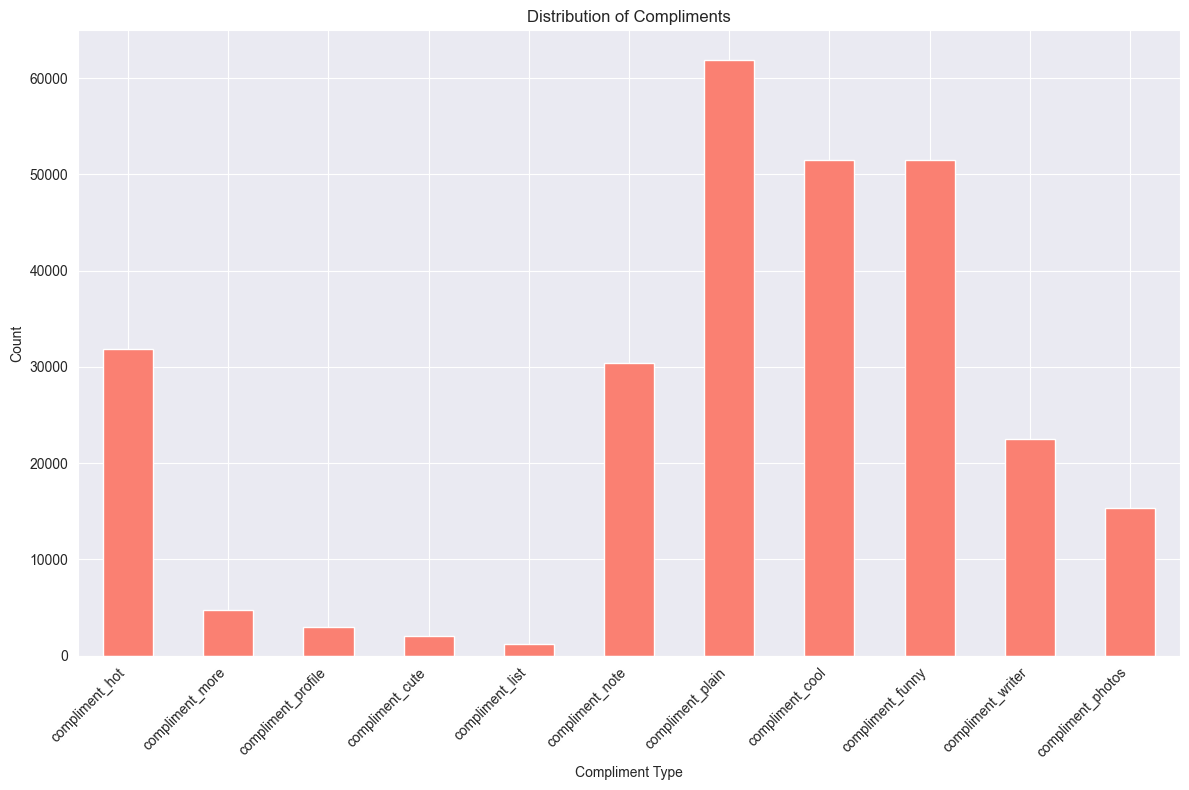

In [10]:
compliment_cols = [col for col in df.columns if 'compliment' in col]
total_compliments = df[compliment_cols].sum()

plt.figure(figsize=(12, 8))
total_compliments.plot(kind='bar', color='salmon')
plt.xlabel('Compliment Type')
plt.ylabel('Count')
plt.title('Distribution of Compliments')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

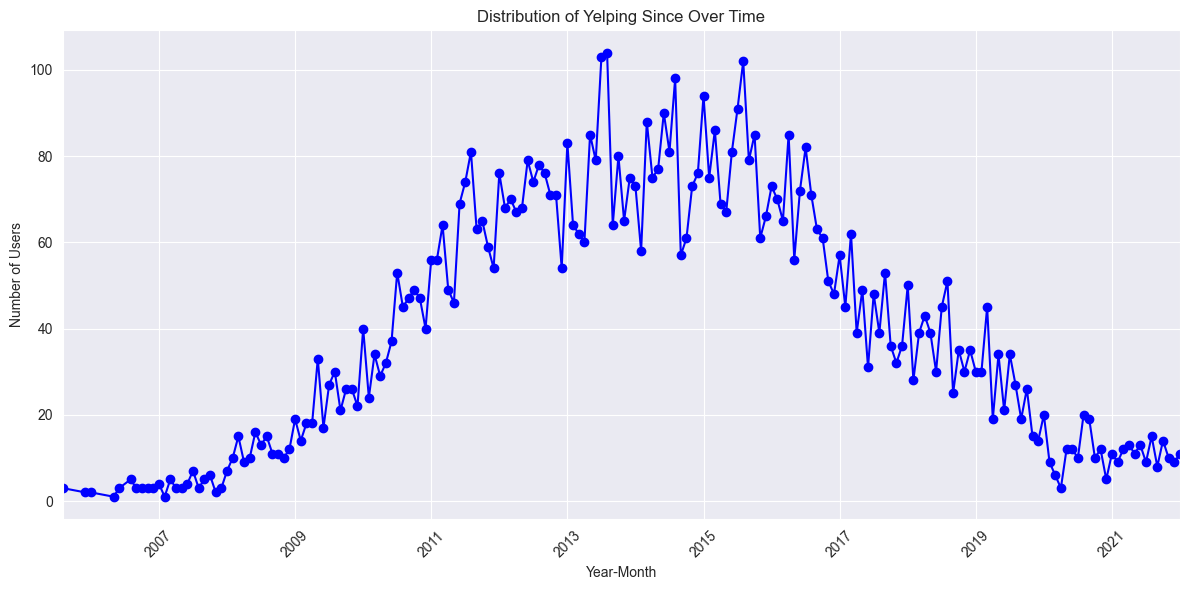

In [11]:
df['yelping_since'] = pd.to_datetime(df['yelping_since'])
yelping_counts = df.groupby(df['yelping_since'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
yelping_counts.plot(color='blue', marker='o', linestyle='-')
plt.xlabel('Year-Month')
plt.ylabel('Number of Users')
plt.title('Distribution of Yelping Since Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Users with 0 reviews: 0
Num users: 7707


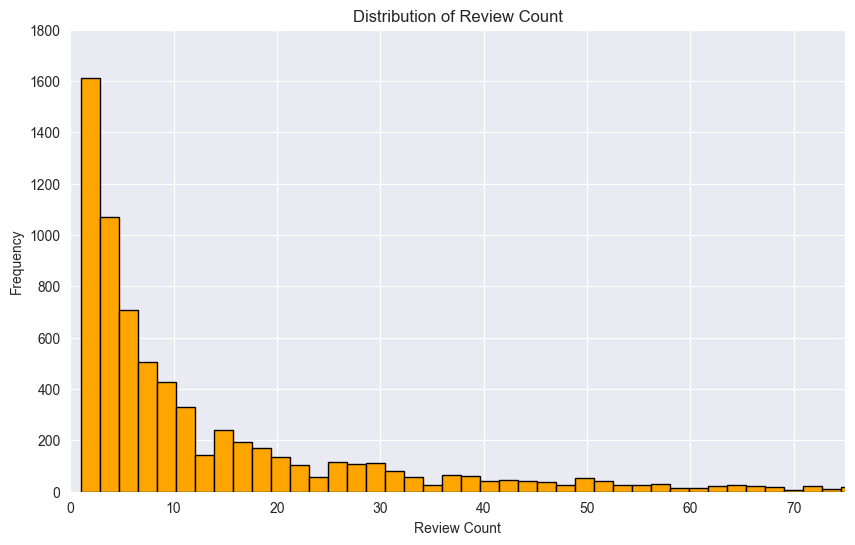

In [12]:
print(f"Users with 0 reviews: {df[df['review_count'] == 0].shape[0]}")
print(f"Num users: {df.shape[0]}")

plt.figure(figsize=(10, 6))
plt.hist(df['review_count'], bins=9000, color='orange', edgecolor='black')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.xlim(0, 75)
plt.ylim(0, 1800)
plt.title('Distribution of Review Count')
plt.grid(True)
plt.show()

Users with 0 fans: 5716
Num users: 7707


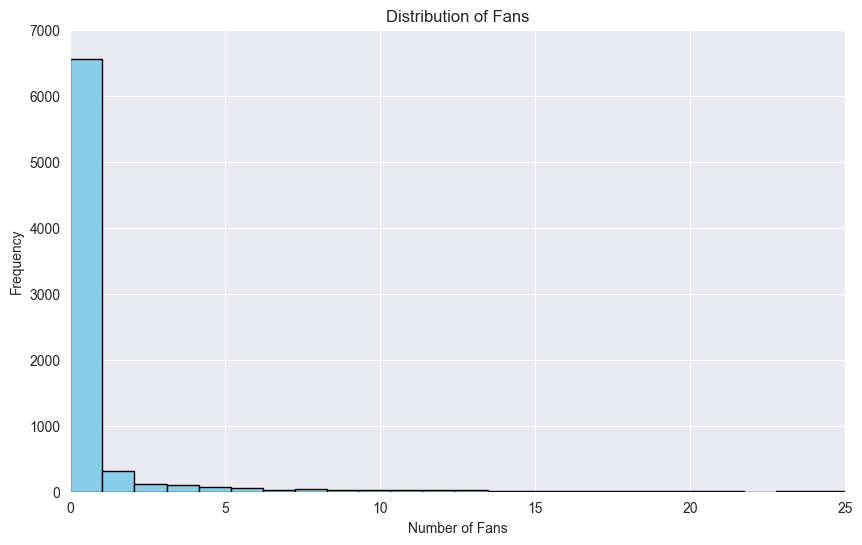

In [13]:
print(f"Users with 0 fans: {df[df['fans'] == 0].shape[0]}")
print(f"Num users: {df.shape[0]}")

plt.figure(figsize=(10, 6))
plt.hist(df['fans'], bins=1100, color='skyblue', edgecolor='black')
plt.xlabel('Number of Fans')
plt.ylabel('Frequency')
plt.xlim(0, 25)
plt.ylim(0, 7000)
plt.title('Distribution of Fans')
plt.grid(True)
plt.show()

Users with 0 friends: 3169
Num users: 7707


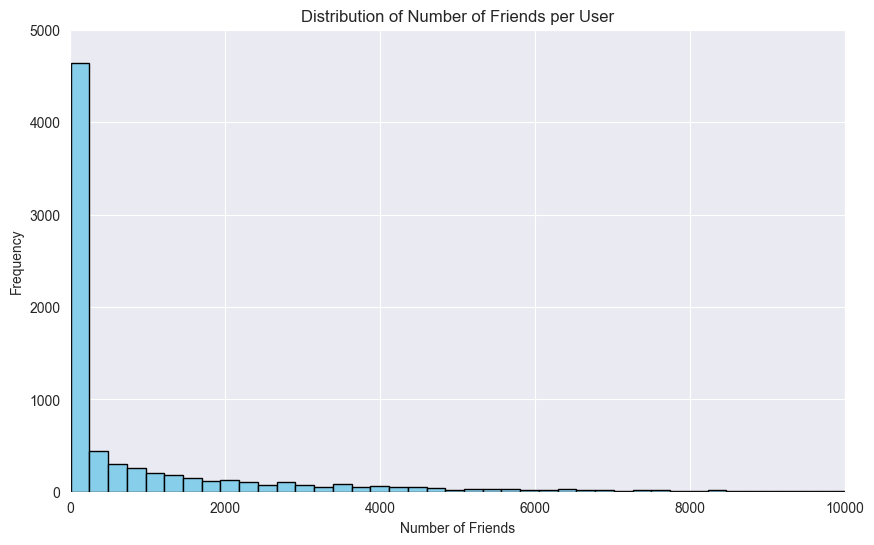

In [14]:
df['num_friends'] = df['friends'].apply(len)

print(f"Users with 0 friends: {df[df['num_friends'] == 4].shape[0]}")
print(f"Num users: {df.shape[0]}")

plt.figure(figsize=(10, 6))
plt.hist(df['num_friends'], bins=1000, color='skyblue', edgecolor='black')
plt.xlabel('Number of Friends')
plt.ylabel('Frequency')
plt.xlim(0, 10000)
plt.ylim(0, 5000)
plt.title('Distribution of Number of Friends per User')
plt.grid(True)
plt.show()

Users with 1 reviews: 5745


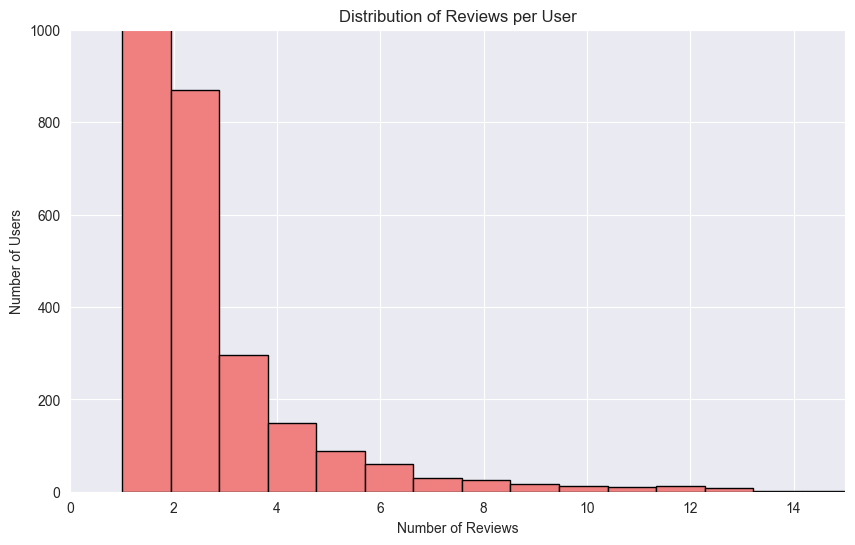

In [15]:
# reviews per user (x-axis) vs. number of users (y-axis)

reviews = pd.read_csv(f'../filtered_cities/{city}_review.csv')
reviews_per_user = reviews.groupby('user_id').size()

print(f"Users with 1 reviews: {reviews_per_user[reviews_per_user == 1].shape[0]}")

plt.figure(figsize=(10, 6))
plt.hist(reviews_per_user, bins=100, color='lightcoral', edgecolor='black')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.title('Distribution of Reviews per User')
plt.xlim(0, 15)
plt.ylim(0, 1000)
plt.grid(True)
plt.show()

Users with 0 tips: 0


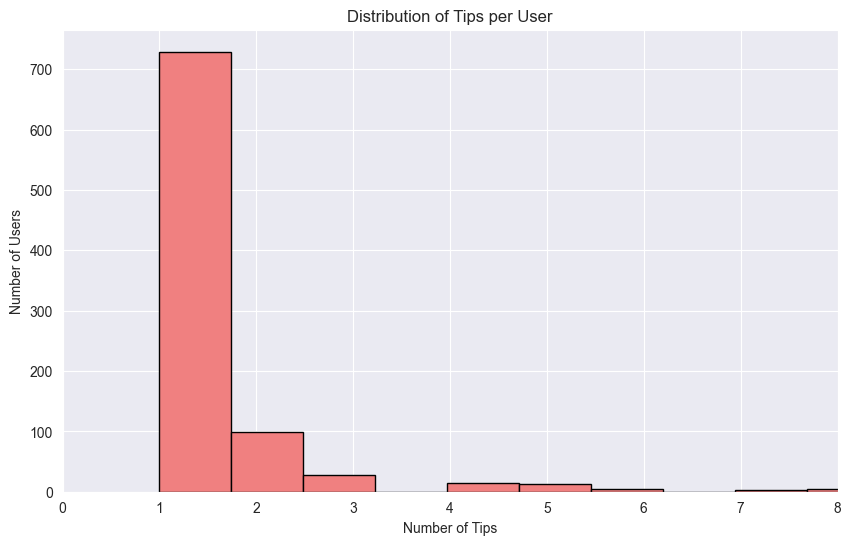

In [16]:
# tips per user (x-axis) vs. number of users (y-axis)
tips = pd.read_csv(f'../filtered_cities/{city}_tip.csv')
tips_per_user = tips.groupby('user_id').size()

print(f"Users with 0 tips: {tips_per_user[tips_per_user == 0].shape[0]}")

plt.figure(figsize=(10, 6))
plt.hist(tips_per_user, bins=35, color='lightcoral', edgecolor='black')
plt.xlabel('Number of Tips')
plt.ylabel('Number of Users')
plt.title('Distribution of Tips per User')
plt.xlim(0, 8)
#plt.ylim(0, 5)
plt.grid(True)
plt.show()

from
-18_TmfN3l667ukOYRGPzw    3
-2fEkE_j7_syVn6hwbEuUQ    4
-6y3e3PSQZvbVzz0KinimA    4
-BHRqGRqa0uZK1Z7v-EywA    2
-BdYLIj51UcXiJebg8PS4g    2
                         ..
yEGClWugJyBMcOIIm_d0dA    0
q4mOU6YL850_OsrrE1_ScA    0
2brjqRYgw2CYcoDwSKTrog    0
f9Lm5TrNfVX1JmVXIbtCOg    0
vL0jIpZO771Q6girrQSXoA    0
Length: 7707, dtype: int64
Users with 0 friends: 868


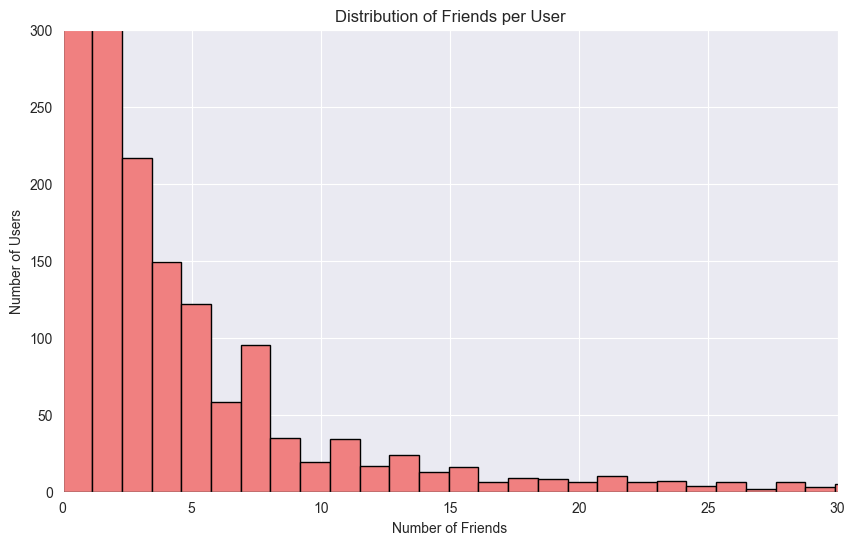

In [28]:
# friends per user (x-axis) vs. number of users (y-axis)
friendship = pd.read_csv(f'../nodes_and_edges/{city}_friendships_edges.csv')

users = pd.read_csv(f'../nodes_and_edges/{city}_friendships_nodes.csv')

friendship = friendship[friendship['from'] != friendship['to']]
friendship = friendship.drop_duplicates(subset=['from', 'to'])
friendship = friendship.groupby('from').size()

# add users with no friends (index=id and value=0)
for user in users['id']:
    if user not in friendship.index:
        friendship[user] = 0

print(f"Users with 0 friends: {friendship[friendship == 1].shape[0]}")

plt.figure(figsize=(10, 6))
plt.hist(friendship, bins=300, color='lightcoral', edgecolor='black')
plt.xlabel('Number of Friends')
plt.ylabel('Number of Users')
plt.title('Distribution of Friends per User')
plt.xlim(0, 30)
plt.ylim(0, 300)
plt.grid(True)
plt.show()